# EDA Price Runner

**Assignment** 
- Analyze the overall and unit economics of product creation by considering  clicks and click revenues for a given set of products. 
- Present your insights as well as your methodology.
- List potential next steps to refine the current solution.

**Data** 
Given are three datasets: 
- A set of products created in June 2020. 
- Product category and hierarchy structure. 
- Click-out events from Price Runner service to merchants for the period June 2020 to June 2021, for the specific set of products above.


The **product** dataset (`products.csv`) contains the following: 
- `product_id`: Product identifier  
- `category_id`: Category identifier 
- `product_name`: Name of product 
- `product_description`: Product description 
- `creation_time`: Date of creation 


The **hierarchy** dataset (`hiearachies.csv`) contains the following: 
- `parent_hierarchy_id`: Top hierarchy identifier 
- `parent_hierarchy_name`: Top hierarchy name 
- `child_hierarchy_id`: Child hierarchy identifier 
- `child_hierarchy_name`: Child hierarchy name 
- `category_id`: Category identifier 
- `category_name`: Category name 
 
The **clicks** dataset (`clicks.csv`) contains the following: 
- `category_id`: Category identifier 
- `product_id`: Product identifier 
- `click_time`: Time of click-out 
- `click_cost`: Cost for click-out  
- `currency`: Currency of click-out cost


**Questions** 
- How do clicks and click revenue develop over time? 
    - How are the click and revenue distributed over the set of created products? 
    - Does the distribution change over time? 
    - Specifically, how does the share of products that have at least one click develop over time? 
- What is the lifetime value of a product?  
- Is there a pattern between the “age” of a product and the generated click 
revenue?  
- Are there any seasonal patterns to consider? 
- For all the above, are there differences across categories or hierarchies? 
 

In [74]:
# Inport libraries necessary for analysis
import pandas as pd

# Inport libraries necessary for visualisation
from matplotlib import pyplot as plt
import seaborn as sns

## Data Investigation

In [75]:
products = pd.read_csv('products.csv')
products.head(3)

,category_id,product_id,product_name,product_description,creation_time
0,cl27,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25
1,cl1394,5223181,TVS Limbo Momento II 8754340 1400x50,"Electric Heating, Timer, Chrome",2020-06-25
2,cl58,5224117,Oakley Holbrook Ignite Fade Collection Polariz...,"Rectangular, Black Frames, Black Lenses, Targe...",2020-06-26


In [76]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20747 entries, 0 to 20746
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category_id          20747 non-null  object
 1   product_id           20747 non-null  int64 
 2   product_name         20747 non-null  object
 3   product_description  20119 non-null  object
 4   creation_time        20747 non-null  object
dtypes: int64(1), object(4)
memory usage: 810.6+ KB


In [77]:
hierarchy = pd.read_csv('hierarchy.csv')
hierarchy.head(3)

,parent_hierarchy_id,parent_hierarchy_name,child_hierarchy_id,child_hierarchy_name,category_id,category_name
0,t4,Phones & Wearables,t4,Phones & Wearables,cl1,Mobile Phones
1,t2,Computing,t20,Networking,cl9,Mobile Modems
2,t11,Motor Transport,t11,Motor Transport,cl1622,Electric Vehicle Charging


In [78]:
hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   parent_hierarchy_id    360 non-null    object
 1   parent_hierarchy_name  360 non-null    object
 2   child_hierarchy_id     360 non-null    object
 3   child_hierarchy_name   360 non-null    object
 4   category_id            360 non-null    object
 5   category_name          360 non-null    object
dtypes: object(6)
memory usage: 17.0+ KB


In [79]:
clicks = pd.read_csv('clicks.csv')
clicks.head(3)

,category_id,product_id,click_time,currency,click_cost
0,cl68,5206077,2020-12-29,DKK,2.45
1,cl68,5206077,2021-01-06,SEK,2.20
2,cl68,5206077,2020-12-29,SEK,2.20


In [80]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368415 entries, 0 to 2368414
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   category_id  object 
 1   product_id   int64  
 2   click_time   object 
 3   currency     object 
 4   click_cost   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 90.3+ MB


It appears to be no `NaN` values in this dataset. 

In [81]:
clicks.isnull().sum()

category_id    0
product_id     0
click_time     0
currency       0
click_cost     0
dtype: int64

## Data Preprocessing

We are going to merge these datasets together to be able to transform and visualise data easily. 


In [82]:
merged_data = pd.merge(products, hierarchy, on='category_id')
merged_data.drop(columns='category_id', inplace=True)
df = pd.merge(merged_data, clicks, on='product_id')
df.head()


,product_id,product_name,product_description,creation_time,parent_hierarchy_id,parent_hierarchy_name,child_hierarchy_id,child_hierarchy_name,category_name,category_id,click_time,currency,click_cost
0,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-23,DKK,1.65
1,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-28,DKK,1.65
2,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-04-28,DKK,1.65
3,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2020-10-16,DKK,1.85
4,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2020-10-16,DKK,1.40


### Currency conversion

Let's do converting all currencies to a common base currency - USD, using the exchange rates at the relevant time. This allows for direct comparisons between the values in different currencies.

In [84]:
df.currency = df.currency.replace({'DKK': 0, 'SEK': 1, 'GBP': 2, 'EUR': 3, 'USD': 4})
exchange_rates = {0: 0.15, 1: 0.1, 2: 1.27, 3: 1.09, 4: 1}

df['click_cost_USD'] = df['click_cost'] * df['currency'].apply(lambda currency: exchange_rates[currency])
df.head(3)

,product_id,product_name,product_description,creation_time,parent_hierarchy_id,parent_hierarchy_name,child_hierarchy_id,child_hierarchy_name,category_name,category_id,click_time,currency,click_cost,click_cost_USD
0,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-23,0,1.65,0.2475
1,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-28,0,1.65,0.2475
2,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-04-28,0,1.65,0.2475


Now we are going to change data type of columns with dates to `datetime` to process them in pandas.

In [85]:
df.click_time = pd.to_datetime(df.click_time)
df.creation_time = pd.to_datetime(df.creation_time)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351509 entries, 0 to 2351508
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   product_id             int64         
 1   product_name           object        
 2   product_description    object        
 3   creation_time          datetime64[ns]
 4   parent_hierarchy_id    object        
 5   parent_hierarchy_name  object        
 6   child_hierarchy_id     object        
 7   child_hierarchy_name   object        
 8   category_name          object        
 9   category_id            object        
 10  click_time             datetime64[ns]
 11  currency               int64         
 12  click_cost             float64       
 13  click_cost_USD         float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 251.2+ MB


## Metrics Definition

Now let's define relevant metrics and key performance indicators (KPIs) in our analysis. We are going to specify the quantitative measures that will be used to assess the overall and unit economics of product creation.

**Click Count:**
- Definition: The total number of clicks received by all products.
- Purpose: Indicates the overall level of user engagement with the products.

**Click Revenue (for Price Runner):**
- Definition: The total revenue generated from clicks.
- Purpose: Quantifies the monetary value derived from user engagement.

**Limitations:**
It's essential to note that in a real-world scenario, there could be additional factors or fees (such as various fees, taxes, etc.) that might affect the direct correlation between the advertiser's payment and the platform's revenue. The provided DataFrame doesn't contain information about potential additional deductions or fees, so it assumes a straightforward relationship between click cost and revenue.

_____________________________


**Click Cost (for advertiser, already in the df as click_cost):**
- Definition: the amount of money an advertiser pays each time a user clicks on their advertisement. It represents the expenditure incurred by the advertiser for the engagement generated through user clicks.
- Purpose: helps advertisers assess the efficiency and cost-effectiveness of their advertising campaigns, allowing them to manage budgets, evaluate return on investment (ROI), and optimize strategies for maximum impact.

**Cost per Click (for advertiser):**
- Definition: The average cost incurred for each individual click.
- Formula: `Cost per Click = Click Cost / Click Count`
- Purpose: Measures the efficiency of spending on user engagement.

**Click Count per Product:**
- Definition: Number of clicks received for each product, measuring product-specific user engagement.
- Purpose: Assess product popularity and effectiveness of promotional efforts.

_____________________________


**Revenue per Click (for Price Runner)**
- Definition: The average amount of revenue generated for each user click on an advertisement.
- Formula: `Revenue per Click = Click Revenue / Click Count`
- Purpose: Evaluates the efficiency and profitability of individual clicks, providing insights into the monetary return derived from user engagement.

**Revenue per Product (for Price Runner):**
- Definition: The average revenue generated by each product.
- Formula: `Revenue per Product = Click Revenue / Number of Products`
- Purpose: Assesses the individual performance of products in generating revenue.

**Standard Deviation of Click Cost:**
- Definition: Measures variability in click costs, indicating the spread of expenses from the mean.
- Purpose: Assesses the consistency and predictability of advertising costs. A higher standard deviation suggests a wider range of click costs, indicating potential volatility in advertising expenses. Advertisers and financial analysts may use this information to understand the stability of cost structures and make informed decisions.

_____________________________


With key metrics defined let's start by finding totals **Click Count** and **Click Revenue** :



In [87]:
totals = pd.DataFrame([], columns=['total_click_revenue' , 'total_click_count'])
totals.at[0, 'total_click_count'] = df.click_time.count()
totals.at[0, 'total_click_revenue'] = df.click_cost_USD.sum()
totals

,total_click_revenue,total_click_count
0,698181.5484,2351509


Now we are goint to start answering the first question:

## How do clicks and click revenue develop over time? 

and more specifically: 

### How are the click and revenue distributed over the set of created products? 

So let's see how clicks and revenue are distributed over the set of created products. 

For now we can group the data by `product_id` and calculate the **Click Count per Product**, **Revenue per Product**, **Cost per Click**, and **Standard Deviation of Click Cost** for each product.

In [88]:
clicks_summary = df.groupby('product_id').agg({'click_cost_USD': ['count', 'sum', 'mean', 'std']}).reset_index()
clicks_summary.columns = ['product_id', 'click_count', 'total_click_cost_USD', 'mean_click_cost_USD', 'std_click_cost_USD']
clicks_summary

,product_id,click_count,total_click_cost_USD,mean_click_cost_USD,std_click_cost_USD
0,5206077,91,26.4253,0.290388,0.065215
1,5206078,920,238.1175,0.258823,0.031723
2,5206079,8,2.1475,0.268437,0.025633
3,5206080,46,12.8975,0.280380,0.050848
4,5206081,494,352.8314,0.714234,0.448511
...,...,...,...,...,...
17091,3200001542,1238,229.5950,0.185456,0.030487
17092,3200001543,14,6.5659,0.468993,0.059038
17093,3200001544,205,85.9875,0.419451,0.040211
17094,3200001545,208,43.1000,0.207212,0.015578


Now let's visualise clicks and revenue (in USD) distribution over products. 

<Figure size 640x480 with 0 Axes>

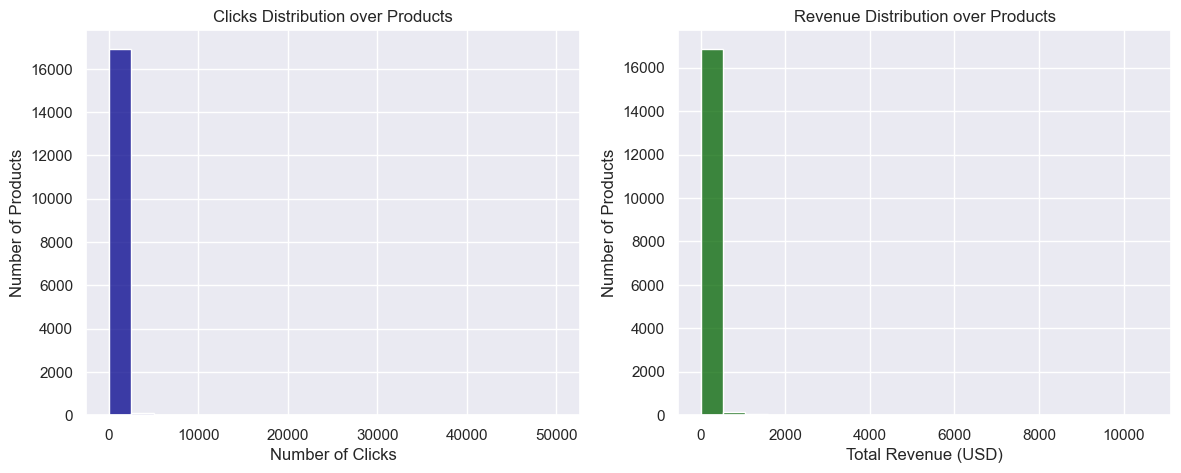

In [89]:
sns.despine()
sns.set(style='darkgrid')

def clicks_destribution(clicks_per_product, revenue_per_product, bins_num):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))

    sns.histplot(clicks_per_product, bins=bins_num, ax=axes[0], color='darkblue')
    axes[0].set_title('Clicks Distribution over Products')
    axes[0].set_xlabel('Number of Clicks')
    axes[0].set_ylabel('Number of Products')

    sns.histplot(revenue_per_product, bins=bins_num, ax=axes[1], color = 'darkgreen')
    axes[1].set_title('Revenue Distribution over Products')
    axes[1].set_xlabel('Total Revenue (USD)')
    axes[1].set_ylabel('Number of Products')

    plt.show()

clicks_destribution(clicks_summary.click_count, clicks_summary.total_click_cost_USD, 20)

Result: 
- The plots show that people click only few times on most products, which is expected. Let's see how the plots will look like if we increase the clicks & revenue count to 50, but put a threshold at 2000 and increase the number of bins. 

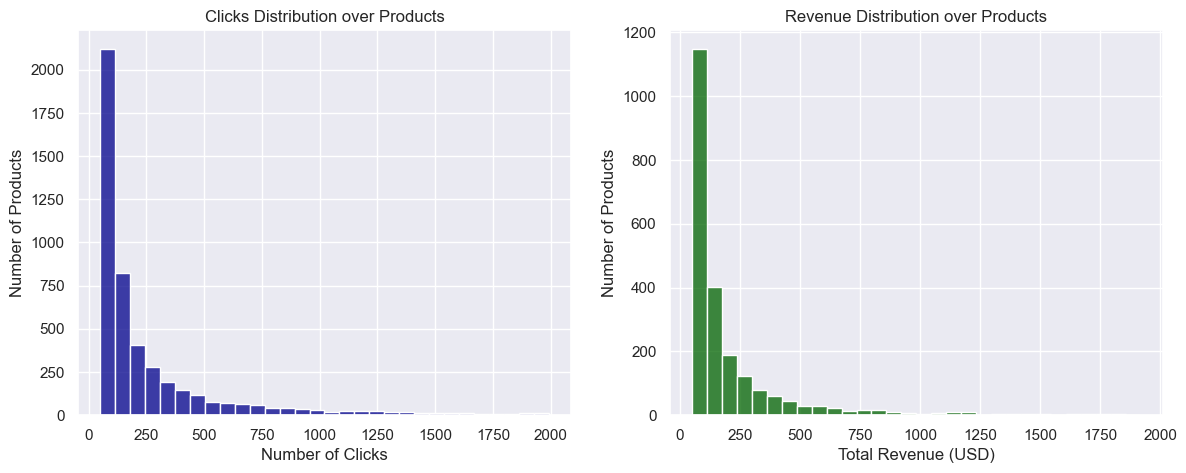

In [90]:
clicks_per_product = clicks_summary.click_count[(clicks_summary.click_count > 50) & (clicks_summary.click_count < 2000)]
revenue_per_product = clicks_summary.total_click_cost_USD[(clicks_summary.total_click_cost_USD > 50) & (clicks_summary.total_click_cost_USD < 2000)]

clicks_destribution(clicks_per_product, revenue_per_product, 30)

Result: 
- Now the distribution is more visible on the plots, but we can still see a drastic difference between the number of clicks in every bin. 

## How do clicks and click revenue develop over time?  

Let's calculate some statistics for clicks per day.

In [91]:
clicks_over_time = df.groupby('click_time').agg({'click_cost_USD': ['count', 'sum', 'mean', 'std']}).reset_index()
clicks_over_time.columns = ['click_time', 'click_count', 'total_click_cost_USD', 'mean_click_cost_USD', 'std_click_cost_USD']
clicks_over_time

,click_time,click_count,total_click_cost_USD,mean_click_cost_USD,std_click_cost_USD
0,2020-06-01,170,48.3330,0.284312,0.114278
1,2020-06-02,493,136.3834,0.276640,0.114651
2,2020-06-03,733,206.9853,0.282381,0.113425
3,2020-06-04,858,240.6301,0.280455,0.146509
4,2020-06-05,1141,308.8931,0.270721,0.145183
...,...,...,...,...,...
390,2021-06-26,4000,1283.2096,0.320802,0.191623
391,2021-06-27,5175,1710.8073,0.330591,0.209136
392,2021-06-28,4903,1625.4921,0.331530,0.203092
393,2021-06-29,4376,1414.9497,0.323343,0.181872


Now let's visualise it.

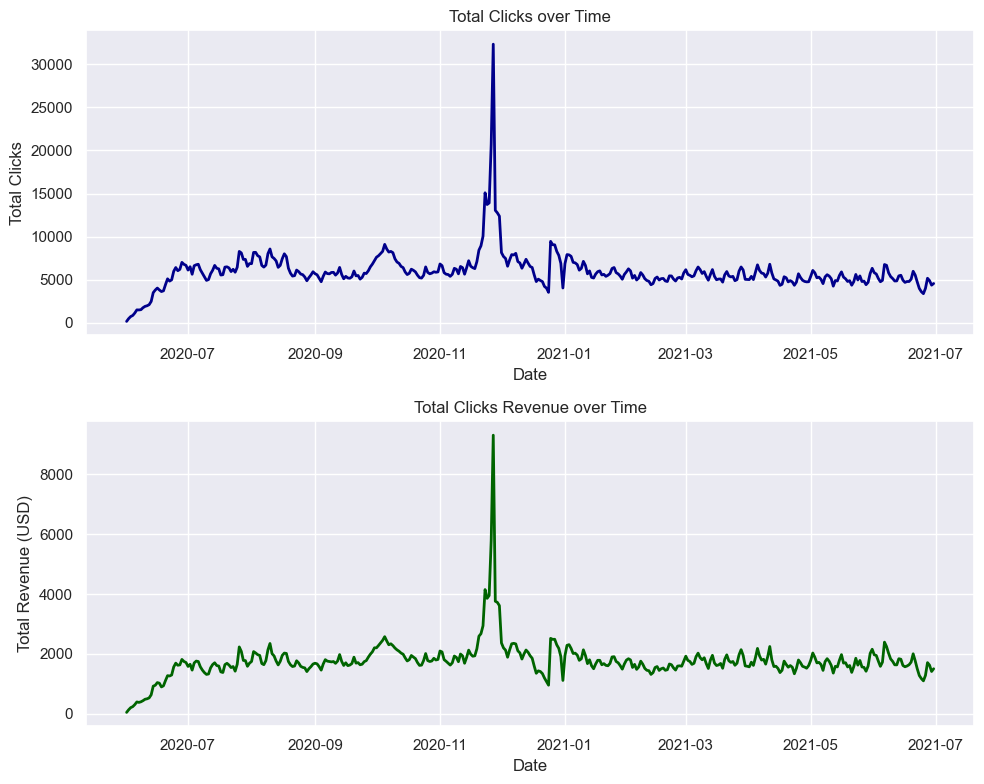

In [92]:
def total_clicks_over_time(data):  
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Number of clicks over time
    sns.lineplot(data=data, x='click_time', y='click_count', ax=axes[0], color='darkblue', linewidth=2)
    axes[0].set_title('Total Clicks over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Total Clicks')

    # Revenue in USD over time
    sns.lineplot(data=data, x='click_time', y='total_click_cost_USD', ax=axes[1], color = 'darkgreen', linewidth=2)
    axes[1].set_title('Total Clicks Revenue over Time')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Total Revenue (USD)')

    plt.tight_layout()
    plt.show()

total_clicks_over_time(clicks_over_time)

As we can see, the plots look very similar, but the scales are different. Let's see what are the statistics for the column `click_cost_USD`. 

In [93]:
df.click_cost_USD.describe()

count    2.351509e+06
mean     2.969079e-01
std      1.812821e-01
min      1.000000e-03
25%      2.100000e-01
50%      2.750000e-01
75%      3.683000e-01
max      2.043900e+01
Name: click_cost_USD, dtype: float64

Results:

- The value of `std` is pretty low (`1.81`), which means that **Revenue per Click** in the `click_cost_USD` is approximately the same and equals `~0.3$`. If we sum almost fixed number (`~0.3$` per click) the same amount of times we have clicks per day - it creates very similar pattern on the line plot. That is why the plots look almost the same.

- The biggest spike in November is most likely the **Black Friday** deals. There are some increases in sales in October.
- Line drops during Christmas and New Year. 

We can also look at distribution by months.

In [94]:
ordered_months = clicks_over_time.click_time.dt.to_period('M').sort_values().astype('category')
revenue_by_month = clicks_over_time.groupby(ordered_months).agg({'total_click_cost_USD': 'sum'}).reset_index()

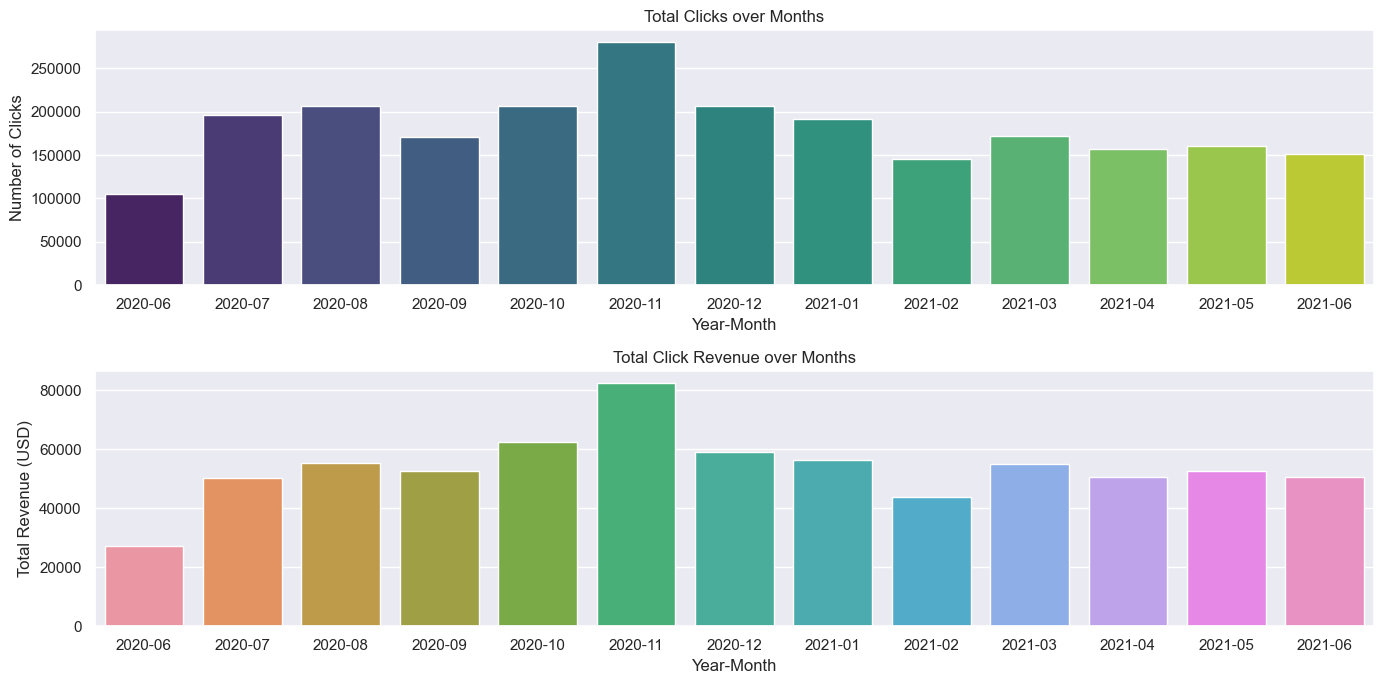

In [95]:
# Changes in Clicks Distribution Over Time
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(14, 7))

# Number of clicks over time
sns.countplot(x=df.click_time.dt.to_period('M').sort_values().astype('category'), palette='viridis', ax=axes[0])
axes[0].set_title('Total Clicks over Months')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Number of Clicks')

# Revenue in USD over time
sns.barplot(x=revenue_by_month.click_time, y=revenue_by_month.total_click_cost_USD, ax=axes[1])
axes[1].set_title('Total Click Revenue over Months')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Total Revenue (USD)')

plt.tight_layout()


Result: 
- Graphs follow approximately the same pattern as we already saw above. 

**Limitations:** There are no specific seasonality patterns visible, because we have only a year of data. 

## How does the share of products that have at least one click develop over time?

Let's compare the **Total Number of Products** and **Products with Clicks** to specific date within a range. We are going to start the range from the first product creation date and finish on the last click date.  

In [96]:
# Find the earliest click for each product
first_click = df[['product_id', 'creation_time', 'click_time']].sort_values(['creation_time', 'click_time']).groupby('product_id').first()

# Find the minimum value of 'creation_time' in the 'first_click'
start_date = first_click['creation_time'].min()
# Find the maximum value of 'click_time' in the original df
end_date = df['click_time'].max()
products_with_clicks_over_time = pd.DataFrame([], columns=['date', 'with_clicks', 'total'])

# Iterate through each day in the range between start_date and end_date.
# For each date, calculate the number of clicks that occurred on or before that date (with_clicks) 
# and the total number of products created on or before that date (total).
def daterange(start, end):
    return [start + pd.offsets.Day(i) for i in range((end - start).days)]

for date in daterange(start_date, end_date):
    products_with_clicks_over_time.loc[len(products_with_clicks_over_time)] = [date, sum(first_click['click_time'] <= date), sum(first_click['creation_time'] <= date)]

# Find ratio of products with clicks and total number of products
products_with_clicks_over_time['ratio'] = products_with_clicks_over_time['with_clicks'] / products_with_clicks_over_time['total']
products_with_clicks_over_time

,date,with_clicks,total,ratio
0,2020-06-01,64,739,0.086604
1,2020-06-02,212,1564,0.135550
2,2020-06-03,381,2298,0.165796
3,2020-06-04,546,3106,0.175789
4,2020-06-05,772,3876,0.199174
...,...,...,...,...
389,2021-06-25,17079,17096,0.999006
390,2021-06-26,17083,17096,0.999240
391,2021-06-27,17086,17096,0.999415
392,2021-06-28,17088,17096,0.999532


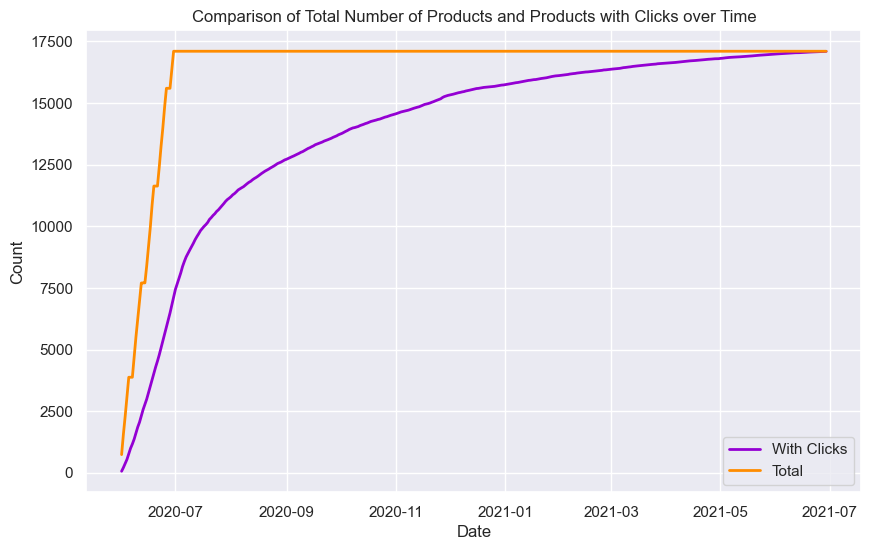

In [97]:
plt.figure(figsize=(10, 6))

sns.lineplot(products_with_clicks_over_time, x='date', y='with_clicks', label='With Clicks', color='darkviolet', linewidth=2)
sns.lineplot(products_with_clicks_over_time, x='date', y='total', label='Total', color='darkorange', linewidth=2)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparison of Total Number of Products and Products with Clicks over Time')

plt.show()

Result: 
- All existing products were iteratively created till July 2020. 
- Number of clicks were steadily growing over the year 2020 and the beginning of 2021.
- In July 2021 all products got at least one click from the day of their creation.  

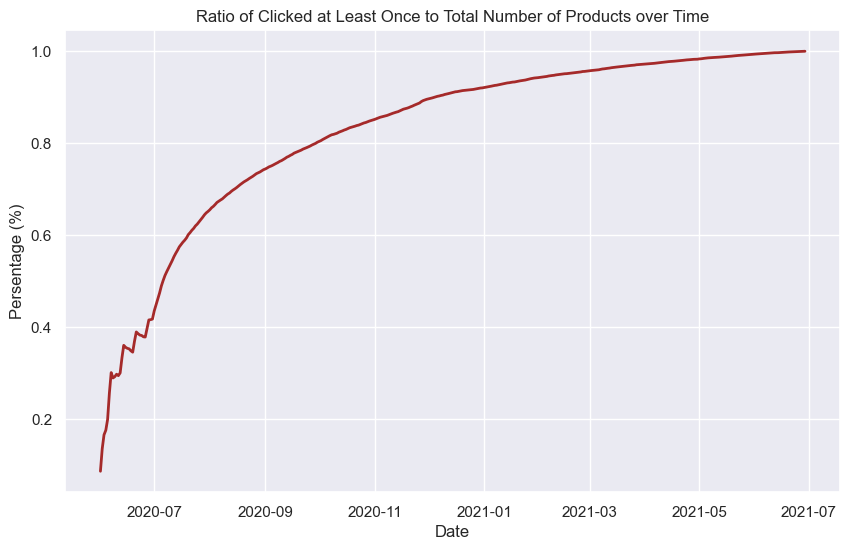

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(products_with_clicks_over_time, x='date', y='ratio', color='brown', linewidth=2)

plt.title('Ratio of Clicked at Least Once to Total Number of Products over Time')
plt.xlabel('Date')
plt.ylabel('Persentage (%)')

plt.show()

Result:
- In the short period during June 2020, every time they have been adding new batch of products the ratio of clicks to the total was dropping, but then the general growth trend has been taking over and line has continued to go up. 

Now let's see how the line looks if we take only the number of clicks per day and compare it with tatal. 

In [99]:
day_click = df[['product_id', 'creation_time', 'click_time']].sort_values(['creation_time', 'click_time']).groupby(['product_id', 'click_time']).first().reset_index()
products_with_clicks_on_a_day = pd.DataFrame([], columns=['date', 'with_clicks_per_day', 'total'])

for date in daterange(start_date, end_date):
    products_with_clicks_on_a_day.loc[len(products_with_clicks_on_a_day)] = [date, sum(day_click['click_time'] == date), sum(first_click['creation_time'] <= date)]
products_with_clicks_on_a_day['ratio'] = products_with_clicks_on_a_day['with_clicks_per_day'] / products_with_clicks_on_a_day['total']
products_with_clicks_on_a_day

,date,with_clicks_per_day,total,ratio
0,2020-06-01,64,739,0.086604
1,2020-06-02,178,1564,0.113811
2,2020-06-03,254,2298,0.110531
3,2020-06-04,317,3106,0.102061
4,2020-06-05,426,3876,0.109907
...,...,...,...,...
389,2021-06-25,1124,17096,0.065746
390,2021-06-26,1384,17096,0.080955
391,2021-06-27,1488,17096,0.087038
392,2021-06-28,1464,17096,0.085634


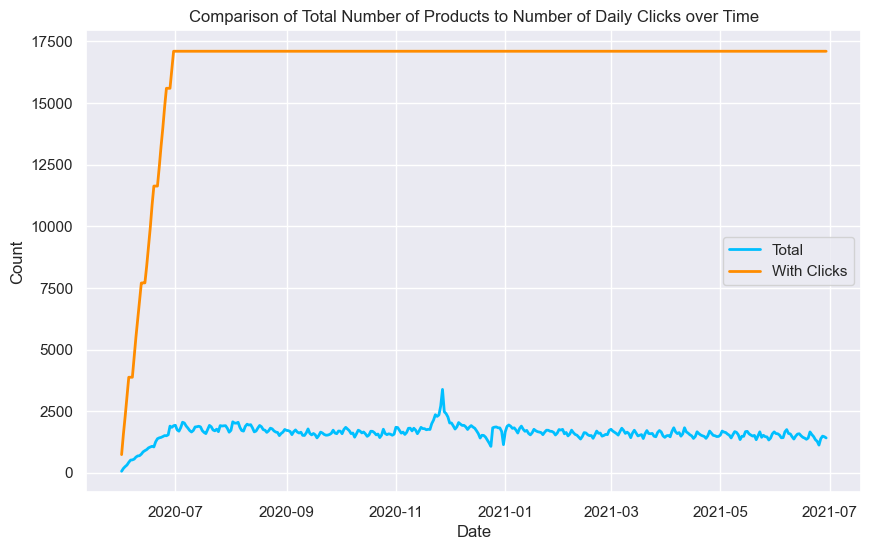

In [100]:
plt.figure(figsize=(10, 6))

sns.lineplot(products_with_clicks_on_a_day, x='date', y='with_clicks_per_day', color='deepskyblue', linewidth=2, label='Total')
sns.lineplot(products_with_clicks_on_a_day, x='date', y='total', color='darkorange', linewidth=2, label='With Clicks')

plt.title('Comparison of Total Number of Products to Number of Daily Clicks over Time')
plt.xlabel('Date')
plt.ylabel('Count')

plt.show()

In [101]:
products_with_clicks_on_a_day.with_clicks_per_day.describe()

count     394.000000
mean     1614.126904
std       308.757642
min        64.000000
25%      1515.000000
50%      1629.000000
75%      1752.750000
max      3383.000000
Name: with_clicks_per_day, dtype: float64

What about ratio? 

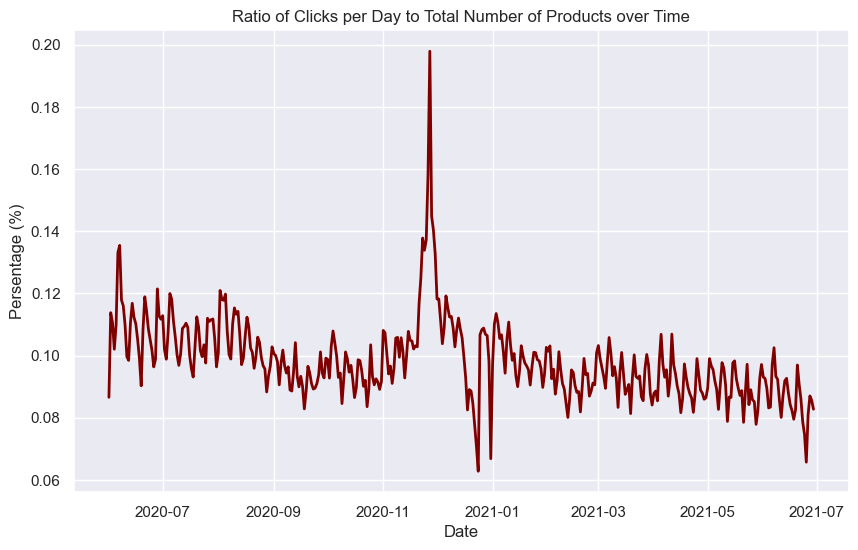

In [102]:
plt.figure(figsize=(10, 6))

sns.lineplot(products_with_clicks_on_a_day, x='date', y='ratio', color='maroon', linewidth=2)

plt.title('Ratio of Clicks per Day to Total Number of Products over Time')
plt.xlabel('Date')
plt.ylabel('Persentage (%)')

plt.show()

Result:
- The number of clicks per day starts from a low number and gradually reaches mean of `1614` with std `308`.
- The spike is noticeable during Black Deals week.
- Line drops during Christmas and New Year. 
- Long term tendency - number of clicks per day decreases, although the total number of products remains the same.

## What is the lifetime value of a product?  

Let's see how much value each product brings. 

In [103]:
# Clicks summary
clicks_summary = df.groupby('product_id').agg({'click_cost_USD': ['count', 'sum', 'mean', 'std'],
                                                        'category_name': 'first', 'product_name':'first', 'parent_hierarchy_name': 'first', 'creation_time': 'first'}).reset_index()

# Flatten multi-level columns
clicks_summary.columns = ['product_id', 'click_count', 'click_sum', 'click_mean', 'click_std', 'category_name', 'product_name', 'parent_hierarchy_name', 'creation_time']
clicks_summary

,product_id,click_count,click_sum,click_mean,click_std,category_name,product_name,parent_hierarchy_name,creation_time
0,5206077,91,26.4253,0.290388,0.065215,Kettles,Nedis KAWK300E,Home & Interior,2020-06-01
1,5206078,920,238.1175,0.258823,0.031723,Tumble Dryers,Bosch WTW87400SN White,Home & Interior,2020-06-01
2,5206079,8,2.1475,0.268437,0.025633,Tumble Dryers,Bosch WTW87500SN White,Home & Interior,2020-06-01
3,5206080,46,12.8975,0.280380,0.050848,Kettles,Nedis KAWK320EGS,Home & Interior,2020-06-01
4,5206081,494,352.8314,0.714234,0.448511,Tumble Dryers,Bosch WTN85201GB White,Home & Interior,2020-06-01
...,...,...,...,...,...,...,...,...,...
17091,3200001542,1238,229.5950,0.185456,0.030487,Soundbars & Home Cinema Systems,Samsung HW-Q66T,Sound & Vision,2020-06-30
17092,3200001543,14,6.5659,0.468993,0.059038,Landline Phones,Panasonic KX-TGH726 Sextet,Phones & Wearables,2020-06-30
17093,3200001544,205,85.9875,0.419451,0.040211,Basketball,Stanlord Pro,Sports & Outdoor,2020-06-30
17094,3200001545,208,43.1000,0.207212,0.015578,Soundbars & Home Cinema Systems,LG SN6Y,Sound & Vision,2020-06-30


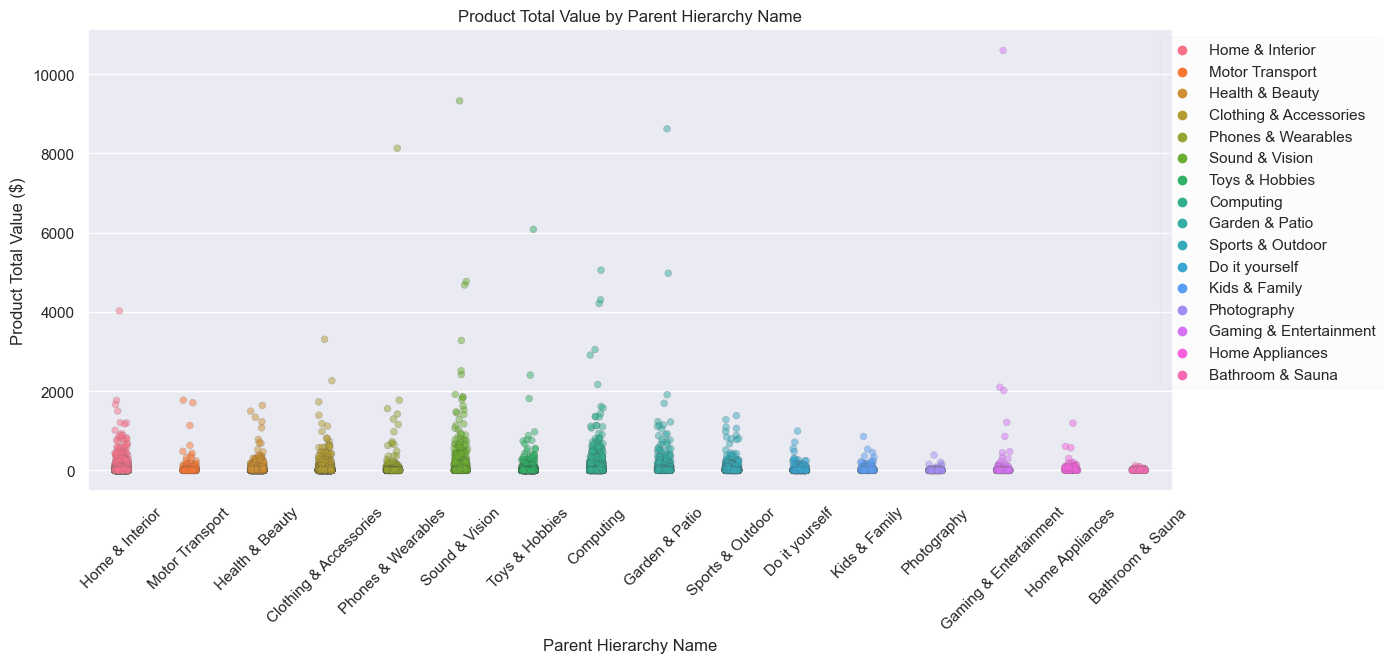

In [104]:
plt.figure(figsize=(14, 6))
sns.stripplot(data=clicks_summary, x='parent_hierarchy_name', y='click_sum', hue='parent_hierarchy_name', alpha=.5, linewidth=.2, jitter=True)

# Set plot title and labels
plt.title('Product Total Value by Parent Hierarchy Name')
plt.xlabel('Parent Hierarchy Name')
plt.ylabel('Product Total Value ($)')

plt.legend(framealpha = 0.1, bbox_to_anchor=(0.7, 0., 0.5, 1))

plt.xticks(rotation=45)

plt.show()


Now let's find top 30 products that bring the most value and display them divided by categories.

In [105]:
top_30 = clicks_summary.nlargest(columns = 'click_sum', n=30)
top_30.head()

,product_id,click_count,click_sum,click_mean,click_std,category_name,product_name,parent_hierarchy_name,creation_time
11387,5220111,50115,10600.3975,0.211521,0.073459,PlayStation 4 Games,FIFA 21,Gaming & Entertainment,2020-06-22
6115,5213618,14816,9327.7879,0.629575,0.490660,TVs,LG 43UN73006,Sound & Vision,2020-06-11
814,5207012,20532,8622.9395,0.419976,0.194134,Swimming Pools & Accessories,Exit Round Stone Pool Ø3.6x0.76m,Garden & Patio,2020-06-02
12,5206089,33055,8131.6459,0.246004,0.134614,Mobile Phones,Samsung Galaxy A21s 3GB RAM 32GB,Phones & Wearables,2020-06-01
1682,5208062,17562,6085.2884,0.346503,0.114191,Toys,Lego Technic Lamborghini Sian FKP 37 42115,Toys & Hobbies,2020-06-03


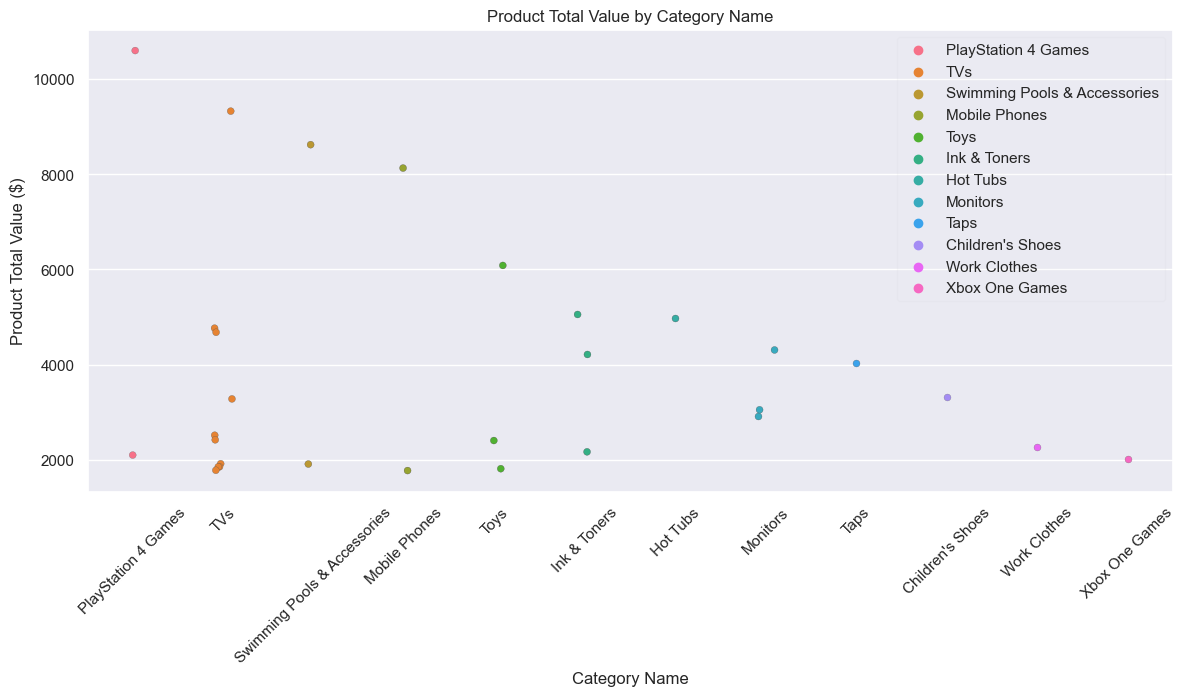

In [106]:
plt.figure(figsize=(14, 6))
sns.stripplot(data=top_30, x='category_name', y='click_sum', hue='category_name', linewidth=0.2)

# Set plot title and labels
plt.title('Product Total Value by Category Name')
plt.xlabel('Category Name')
plt.ylabel('Product Total Value ($)')

plt.legend(framealpha = 0.1, loc='upper right')

plt.xticks(rotation=45)

plt.show()

Result: 
- PlayStation 4 Games, (FIFA 21 specifically) and TVs (LG 43UN73006) bring the most value and get the biggest amount of clicks. 

## Is there a pattern between the “age” of a product and the generated click revenue?  

In [107]:
clicks_summary['product_age'] = end_date - clicks_summary['creation_time']
clicks_summary['product_age']  = clicks_summary.product_age.dt.days

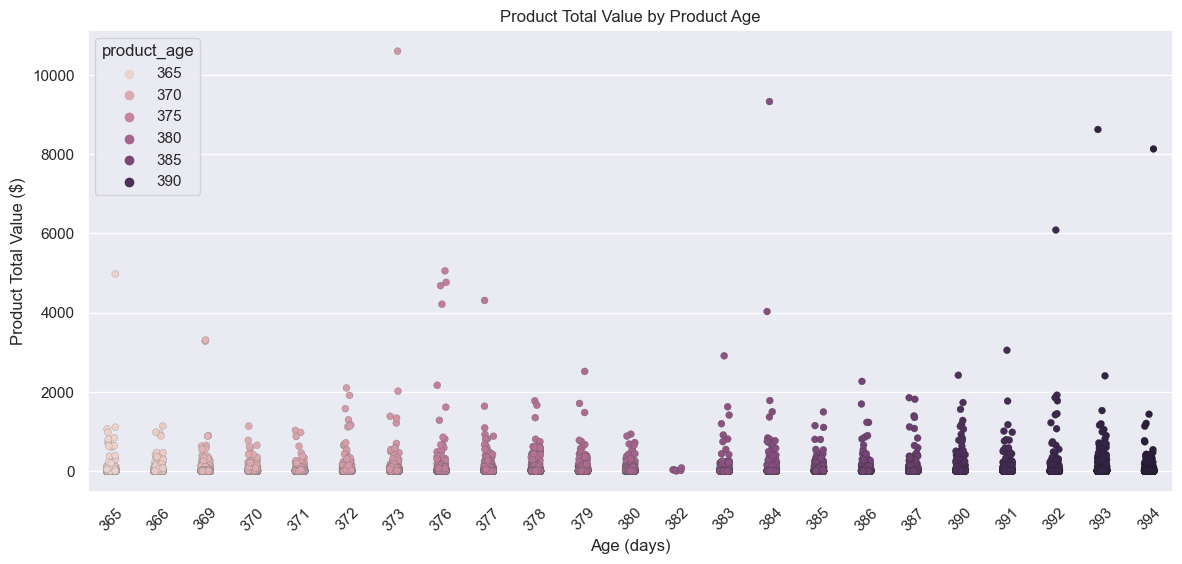

In [108]:
plt.figure(figsize=(14, 6))
sns.stripplot(data=clicks_summary, x='product_age', y='click_sum', hue='product_age', linewidth=0.2)

plt.title('Product Total Value by Product Age')
plt.xlabel('Age (days)')
plt.ylabel('Product Total Value ($)')
plt.xticks(rotation=45)
plt.show()

In [109]:
clicks_summary[['click_sum', 'click_count', 'product_age']].corr()

,click_sum,click_count,product_age
click_sum,1.000000,0.932496,0.025611
click_count,0.932496,1.000000,0.027450
product_age,0.025611,0.027450,1.000000


Result:
- Revenure per product directly depends on the number of clicks for this product, the cost per click is quite stable (`~0.3`), that's why correltaion is so high - `0.93`. 
- Positive correlation between `product_age` and `click_sum` (revenue per product in $) is insignificantly low - `0.025`, because the age is approximately the same as the revenue for most products, besides several outliers. 
- Same picture with `product_age` and `click_count` - correlation is a bit higher `0.027`, but is still too low. 

So there is no stable relationship pattern between age and revenue.

## Conclusion

**Click Distribution:**
- The plots indicate that most products receive a relatively low number of clicks, which is expected. When increasing the click and revenue count threshold to 50 and using a threshold of 2000, the distribution becomes more visible, but there remains a significant difference in the number of clicks across bins.

**Click Cost:**
- The low standard deviation in the `click_cost_USD` column suggests a consistent cost per click, contributing to the similarity in the line plots. The noticeable spikes, particularly in November, are likely associated with Black Friday deals.

**Seasonal Trends:**
- The graphs show patterns such as a spike in November (Black Friday), increases in sales in October, drops during Christmas and New Year, and no specific seasonality due to the limited one-year data.

**Product Creation and Clicks:**
- All existing products were iteratively created until July 2020. The number of clicks steadily grew in 2020 and early 2021. In July 2021, all products received at least one click from the day of their creation.

**Click Trends Over Time:**
- There was a temporary drop in the ratio of clicks to the total during June 2020 when new batches of products were added. However, the overall trend shows a gradual increase in the number of clicks per day.

**Revenue and Correlations:**
- The revenue per product is directly related to the number of clicks, given the stable cost per click (`~0.3`). The high correlation (`0.93`) between click sum and click count supports this relationship. However, the correlation between product age and click sum or click count is low, indicating no stable pattern between age and revenue.
- PlayStation 4 Games, (FIFA 21 specifically) and TVs (LG 43UN73006) bring the most value and get the biggest amount of clicks. 

**Limitations:**
- There is only one year of data, and there is no means to get more, so the seasonality patterns are not clear. There is no info about fees or taxes, so exact revenue and click cost relationships are also unclear. 

**Next steps:**
- We can find for all the above, are there differences across categories or hierarchies? 
    It will take us to repeat all the steps we have already done, but now for categories and hierarchies. 


## Methodology:

**Data Collection:**

- Utilized data provided by the company, including information on clicks, click revenues, product creation dates, click cost, and other relevant metrics.

**Data Cleaning and Preprocessing:**

- Confirmed that the provided data was clean and did not require extensive cleaning.
- Converted currencies to USD to ensure consistency.
- Converted date columns to datetime format for temporal analysis.

**Exploratory Data Analysis (EDA):**

- Conducted exploratory data analysis to understand the distribution and characteristics of key variables, such as clicks, click revenues, and product creation dates.
- Visualized data through plots to identify patterns, trends, and potential outliers.

**Metrics and Key Performance Indicators (KPIs):**

- Defined relevant metrics and key performance indicators (KPIs) to assess overall and unit economics.
- Metrics include click count, click revenue, click cost, cost per click, revenue per product, and any other pertinent indicators.

**Statistical Analysis:**

- Examined correlations between different variables, particularly focusing on relationships between click count, click revenue, and product age.

**Time Trends and Seasonality:**

- Investigated time trends to identify patterns over the year, considering factors such as Black Friday spikes and seasonal variations.
- Analyzed the impact of external events on click behavior, especially during Christmas and New Year.

**Unit Economics Calculation:**

- Calculated unit economics, including cost per click, revenue per product, and any other relevant unit metrics.
- Recognized the influence of click cost stability on the correlation between click count and click revenue.

**Insights and Findings:**

- Summarized key insights, such as the strong correlation between clicks and revenues, seasonal trends, and the impact of specific events like Black Friday.
- Noted the growth in clicks over time, the behavior during product creation, but decline as an overall trend in the number of clicks per day.

**Limitations:**

- Acknowledged the limitations of the analysis, including the reliance on provided data and assumptions made during calculations.

**Next Steps:**

- Proposed potential next steps, such as further analysis to explore additional factors influencing click behavior.

By following this methodology, the analysis aimed to provide a comprehensive understanding of the overall and unit economics of product creation, drawing insights from the available data.